# Lab 2: Solving Nonlinear Equations

### Topics

- **Mathematics:** convergence and divergence of fixed point iterations; graphical interpretation of convergence criterion.  Newton's method; using a numerical derivative in Newton's method.
- **Python:**
    - Using commands like `x = g(x)` to update variables; `for` loops; verifying solutions; functions; formatting output; decisions using `if`; testing for convergence; plotting.

Checkpoints indicate tasks or questions which your tutor may ask you about.

### Plotting

Plotting is particularly important for some parts of this course, including this lab.  Matplotlib has different ways it can work in Jupyter notebooks (called "backends").  To get interactive plots rather than the default static ones, you need the line `%matplotlib widget` before you import matplotlib.pyplot.  The `%` makes a special [“magic” command](https://ipython.readthedocs.io/en/stable/interactive/magics.html).  The widget backend depends on the ipympl package.

Troubleshooting:
- Our MathLabExternal remote desktop server is set up so it all just works in Jupyter Lab.  See <a href="https://learn.canterbury.ac.nz/course/view.php?id=21513&section=3">instructions</a> on Learn.
- Switching Matplotlib backend requires restarting your kernel with the <i class="fa-repeat fa"></i> button.
- You should run Jupyter Lab rather than Jupyter Notebook.
- If you have an old version of Jupyter you may need `%matplotlib notebook` to get interactive plots.
- This particular lab needs interactive plots so you can zoom in to see what's happening, but in a situation where you don't need interactive plots you can use `%matplotlib inline` or leave out the `%matplotlib` line.
- If you're working on your own computer or a lab computer you may be missing the `ipympl` package, which is what makes `%matplotlib widget` work.  You can install it (only needs to be done once!) with:
  - If you're working in Anaconda, run `conda install ipympl` in a Terminal from within Jupyter Lab.
  - If you're working in Visual Studio Code, run `%pip install ipympl` in a notebook cell (then delete that cell).
  - If you're on your own computer and have installed Python and packages manually, run `%pip install ipympl` in a notebook cell (then delete that cell).  (Or run `python -m pip install ipympl` from a command prompt.)

Things that don't seem to work:
- Anaconda in the CAD lab.
- Jupyter Notebook rather than Jupyter Lab.

It's easy to get mixed up which plot you're referring to when you're adding to an existing one, and if you're not careful you can end up modifying an old plot elsewhere in the notebook.  It is *highly recommended* that you:
- Keep all code for each plot in just one cell.
- Use figure and axis objects, i.e. `fig, ax = plt.subplots()` then `ax.plot`, instead of `plt.plot`.  You will often find `plt.plot` used in online examples, so be careful!

### Check interactive plotting is working

In [ ]:
#Click on this cell to select it, then press shift-Enter to run it and select the next cell.

import numpy as np

#Switch on interactive plots:
%matplotlib widget
import matplotlib.pyplot as plt

Run the next cell too, and make sure you get a plot.
- There should be buttons to interact with it.
- Check that the <i class="fa fa-fw fa-square-o"></i> button lets you draw a rectangle to zoom into part of the plot.

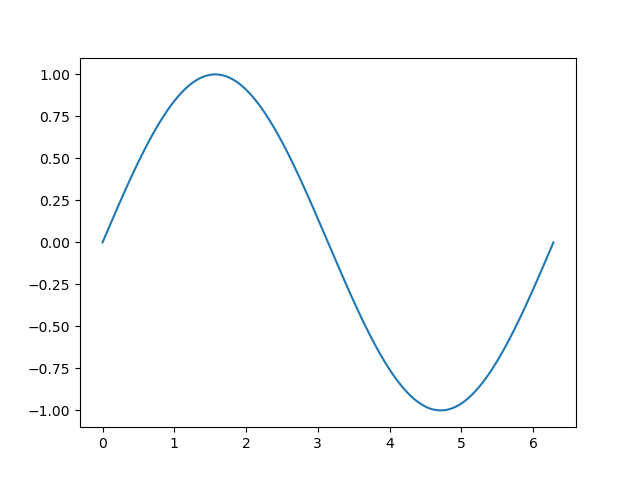

In [ ]:
x = np.linspace(0, 2*np.pi, 1000) #Make a vector of 1000 x values from 0 to 2π.
fig, ax = plt.subplots() #Get figure and axis objects for safer plotting.
ax.plot(x, np.sin(x)); #The ; prevents printing a non-useful text description.

## Fixed point iteration
### Iterations

In this first part of the lab, we will look at Exercise 6.1 from page 157 of Chapra and Canale (5th edition).

The aim is to solve the equation
$$
  2\sin\left(\sqrt{x}\right) - x = 0 \qquad\qquad(1)
$$
using iterations of the form

$$
  x_{k+1} = g(x_k).
$$

One way of finding a suitable function $g(x)$ is to rearrange the given equation to the form

$$
  x = g(x).
$$

Then the solution $x$ is a fixed point for the function $g(x)$.

In the first part of this lab you will use the function

$$
  g(x) = 2\sin\left(\sqrt{x}\right)
$$

with the initial guess at a solution as

$$
  x_0 = 0.5
$$

One way of calculating the next few iterations is to follow the mathematical notation

$$
  x_{k+1} = g(x_k),
$$

```
x0 = 0.5
x1 = 2*np.sin(np.sqrt(x0))
x2 = ????
x3 = ????
```

and so on.

Obviously this is a little tedious!  To find a better way of doing the calculations we need to realize that for Python

$$
  x_{k+1} = g(x_k)
$$

is a command, not an equation.

For Python this command says, “Plug $x_k$ into the function $g$, and then store the result in the variable $x_{k+1}$.”

So we do not need to keep introducing new variables x0, x1, x2, x3 and so on.  We can use just one variable to store the latest approximation:

```
x = 0.5
x = 2*np.sin(np.sqrt(x))
x = 2*np.sin(np.sqrt(x))
```

(If you do need to store all the iterations as you go, you'll need to append the value of `x` to a list before overwriting it.)

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>

  Starting with $x = 0.5$, use a for loop and <code>print</code> to determine how many iterations (repetitions) it takes for successive $x$-values agree to four decimal places.
</div>

In [3]:
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt

x0 = 0.5

for i in range(0,2000):
    print(x0)
    x1=2*np.sin(np.sqrt(x0))
    if np.abs(x1 - x0) < 0.0001:
        print(x1)
        break
    x0 = x1

0.5
1.299273878160125
1.8171475041374952
1.950573917289759
1.9697425133384816
1.9720688812739464
1.9723441782726674
1.9723766559775857


### Graphical interpretation

We can see why the above iterations converge if we look at the graph of the function $g(x)$.  The fixed point we are looking for occurs where this graph cuts the line $y=x$, so we need to plot $y=g(x)$ and $y=x$ on the same graph.

The following commands set up a range of $x$-values covering the interval $[0, 4]$, store the corresponding $g(x)$ values in the variable `y`, and then plot $y=x$ as a dashed blue line (`'b--'`), and $y=g(x)$ as a solid red line (`'r-'`).

0.5
1.299273878160125
1.8171475041374952
1.950573917289759
1.9697425133384816
1.9720688812739464
1.9723441782726674
1.9723766559775857


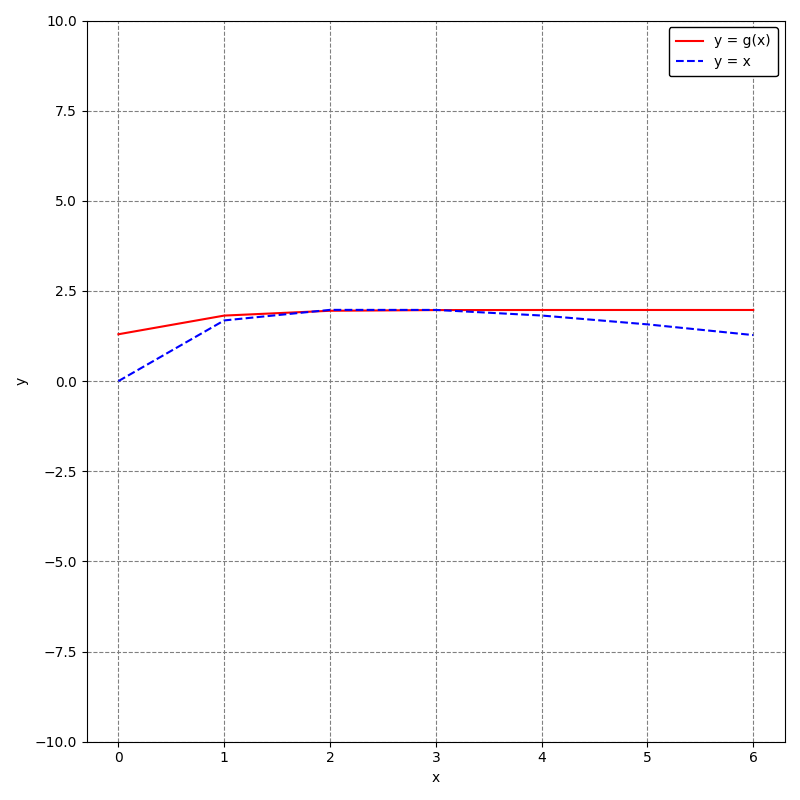

In [5]:
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt

x0 = 0.5

x_list = []

for i in range(0,2000):
    print(x0)
    x1=2*np.sin(np.sqrt(x0))
    x_list.append(x1)
    if np.abs(x1 - x0) < 0.0001:
        print(x1)
        break
    x0 = x1

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

xs = range(0,i+1)

ax.plot(xs, x_list, 'r-', label='y = g(x)')
ax.plot(xs, 2*np.sin(np.sqrt(xs)), 'b--', label='y = x')

ax.set_ylim(-10, 10)

ax.margins(0.05, 0.1)

ax.grid(color='grey', linestyle='--')
ax.set_axisbelow(True)

ax.set_title('')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper right', edgecolor='black', framealpha=1, borderpad=0.5)

plt.tight_layout()
plt.show() # This isn't necessary in a notebook, but can be in a standalone program.  It also means we don't need ;

Try the commands

```
ax.plot?
```

or

```
help(ax.plot)
```

below to see how such plot commands are put together (the `ax` is the variable made by running the code above). 

You can find (much) more information about `ax.plot` in matplotlib's [online documentation](https://matplotlib.org/stable/index.html). You can also find other [examples](https://matplotlib.org/stable/plot_types/index.html) on their [website](https://matplotlib.org/) or read their [basic usage tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

Most Python modules have online documentation, such as [Python](https://docs.python.org/3/c-api/index.html) itself, [numpy](https://numpy.org/doc/stable/reference/), and [scipy](https://docs.scipy.org/doc/scipy/reference/). You should keep these links handy and refer to them regularly.

In [6]:
help(ax.plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. L

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 2</h3>

  What would you expect to happen if you started the iterations with $x_0 = 3.5$ instead? (Use the graph! Check your answer by doing a few iterations.)
</div>

3.5
1.9106538472864512
1.9645607320773328
1.9714502226953283
1.9722711156357426
1.9723680386027287


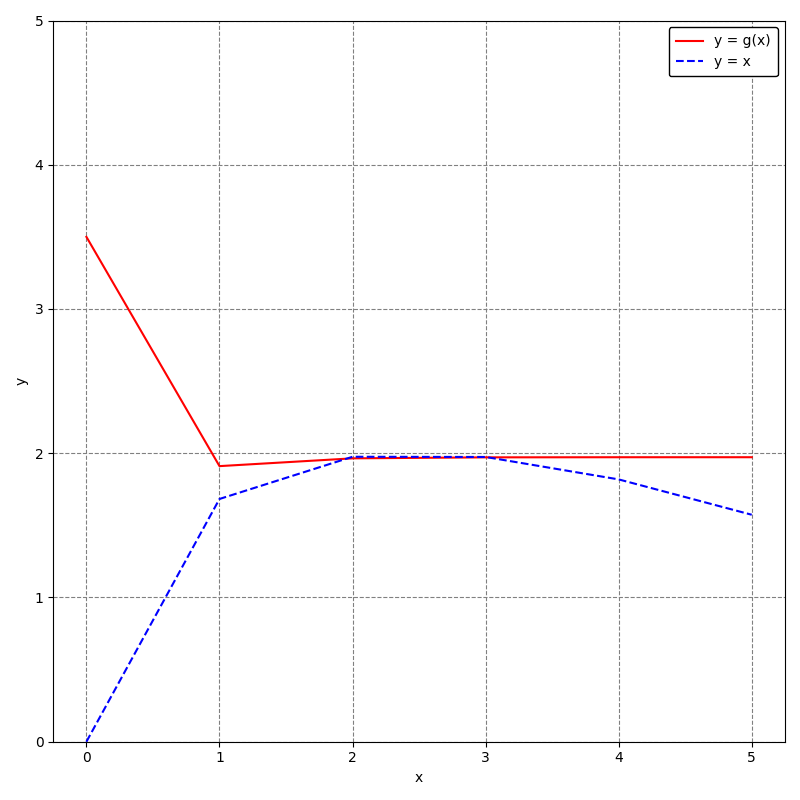

In [29]:
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt

x0 = 3.5

x_list = [x0]

for i in range(0,2000):
    print(x0)
    x1=2*np.sin(np.sqrt(x0))
    x_list.append(x1)
    if np.abs(x1 - x0) < 0.0001:
        print(x1)
        break
    x0 = x1

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

xs = range(0,i+2)

ax.plot(xs, x_list, 'r-', label='y = g(x)')
ax.plot(xs, 2*np.sin(np.sqrt(xs)), 'b--', label='y = x')

ax.set_ylim(0, 5)

ax.margins(0.05, 0.1)

ax.grid(color='grey', linestyle='--')
ax.set_axisbelow(True)

ax.set_title('')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='upper right', edgecolor='black', framealpha=1, borderpad=0.5)

plt.tight_layout()
plt.show() # This isn't necessary in a notebook, but can be in a standalone program.  It also means we don't need ;

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>

  Use a <code>for</code> loop to carry out 7 steps of the iteration
  $$
    x_{k+1} = 2\sin\left(\sqrt{x_k}\right)
  $$
  using the starting value $x_0 = 0.01$.  What happens? Why?
</div>

In [30]:
import numpy as np
x0 = 0.01
print(x0)
for i in range(0,7):
    x1 = 2*np.sin(np.sqrt(x0))
    print(x1)
    x0=x1
    
#IT CONVERGES TO 1.971

0.01
0.1996668332936563
0.8642376194402882
1.602813898942033
1.9078299129419154
1.9641766753148189
1.9714040692640435
1.9722656606894342


### Another iteration formula

Find a different rearrangement of the original equation

$$
  2\sin\left(\sqrt{x}\right) - x = 0
$$

into the form

$$
  x = g(x).
$$

Write new code below to do 10 iterations using this new $g(x)$, starting with $x_0 = 0.5$.

Plot $y=g(x)$ and $y=x$ on the same graph (make sure you are plotting the function $g(x)$ over an appropriate range of $x$ values).  <b>Note: $x^2$ is written <code>x**2</code> in Python.</b>

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 4</h3>
  <ul>
    <li>What solutions have you found to equation (1)?</li>
    <li>How can you check that they really are solutions?</li>
    <li>Why did the second rearrangement you used converge to a different value to the first one?</li>
  </ul>
</div>

In [31]:
import numpy as np
x0 = 0.5
print(x0)
for i in range(0,10):
    x1 = (np.arcsin(x0/2))**2
    print(x1)
    x0=x1
    
# PLUG FOUND X INTO ORIGIONAL EQUATION TO SEE IF IT EQUALS 0, BECAUSE ITS SQUARING A NUMBER THAT WILL ALMOST ALWAYS BE SMALLER THAN 1

0.5
0.06384731133866596
0.0010194661813050523
2.598278462096788e-07
1.6877627416490223e-14
7.121357680246561e-29
1.2678433802501671e-57
4.0185670921104247e-115
4.0372203684482086e-230
0.0
0.0


## Newton's Method

We begin by looking at Chapra and Canale's Exercise 6.4 which asks us to solve the equation

$$
  -1 + 5.5x - 4x^2 + 0.5x^3 = 0
$$

both graphically and using Newton's method.

### Finding initial approximations

Begin by solving the equation graphically: plot this function and $y = 0$ on the same axes to help you find approximations to all the solutions to this equation.  Your approximations do not need to be very accurate, as you are going to use Newton's method to improve the accuracy.

In [38]:
def get_root(x0):
    x_list = [x0]
    for i in range(0,2000):
        x1 = (4*x0**2-0.5*x0**3+1)/5.5
        x_list.append(x1)
        if np.abs(x1 - x0) < 0.0001:
            break
        x0 = x1
    return x_list

x_list1 = get_root(0.5)
x_list2 = get_root(0.01)
x_list3 = get_root(3.5)

print(x_list1)
print(x_list2)
print(x_list3)


[0.5, 0.3522727272727273, 0.2680957211341438, 0.23233936917561102, 0.21993732844849426, 0.2160309568070649, 0.21484299680076482, 0.21448577161072171, 0.21437872136250408, 0.21434667467975715]
[0.01, 0.1818908181818182, 0.20533240300173297, 0.21169400591655707, 0.213547989763701, 0.2140985070147754, 0.21426286197592848, 0.2143120081561558]
[3.5, 5.193181818181818, 7.063405926635816, 4.429843055113209, 6.5508189726593455, 5.835367054250319, 6.882637953929038, 4.993657099230162, 6.99709128405542, 4.645608644954553, 6.763036341174302, 5.32518735511303, 7.077392866973171, 4.382992779376516, 6.4986338076640235, 5.946005401241471, 6.783539857718733, 5.270648391525882, 7.074605722795264, 4.392366024119838, 6.509240619871805, 5.92398119406628, 6.8049887622362375, 5.212584318331768, 7.066997255881618, 4.417858463477568, 6.537668378727798, 5.863788500757437, 6.859229952325615, 5.061102774065727, 7.025377354285276, 4.554854920482347, 6.679582086445177, 5.537531292177525, 7.04634209072058, 4.486364

### Building a program for Newton's method

The given equation is in the form $f(x) = 0$.  Newton's method solves such equations by using iterations of the form

$$
  x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

Use the following skeleton to write code which will carry out Newton's method to find one of the solutions to the above equation.  Remember that Python ignores anything after the `#` sign, so you can use this to include comments.

```
x = ???                # the initial approximation to the solution
for k in range(???):   # the number of iterations to be performed
   f = ???             # an expression for f(x)
   dfdx = ???          # an expression for the derivative of f(x)
   x = ???             # the formula for a Newton's method iteration
```

<b>Note: $x^2$ is written <code>x**2</code> in Python.</b>

In [4]:
import numpy as np

def get_root(x0):
    x_list = [x0]
    for iteration in range(0,2000):
        x1 = (4*x0**2-0.5*x0**3+1)/5.5
        x_list.append(x1)
        if np.abs(x1 - x0) < 0.0001:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return x_list
        x0 = x1
    print("Maximum number of iterations reached. No convergence.")
    return x_list

def newtons_method(x0):
    x_list = [x0]
    for iteration in range(0,2000):
        
        f = (-1) + (5.5*x0) - (4*x0**2) + (0.5*x0**3)
        dfdx = (5.5) - (8*x0) + (1.5*x0**2)
        x1 = x0 - f / dfdx
        x_list.append(x1)
        if np.abs(x1 - x0) < 0.0001:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return x_list
        x0 = x1
    
    print("Maximum number of iterations reached. No convergence.")
    return x_list

get_root(0.5)
get_root(1)
get_root(6)

newtons_method(0.5)
newtons_method(1)
newtons_method(6)

Root found at 0.21437872136250408 after 9 iterations.
Root found at 0.2144311177611384 after 11 iterations.
Maximum number of iterations reached. No convergence.
Root found at 0.21433292360785472 after 5 iterations.
Root found at 1.479774541816106 after 5 iterations.
Root found at 6.305897680394438 after 4 iterations.


[6,
 6.3478260869565215,
 6.306535428588467,
 6.305897680394438,
 6.305897529333438]

### Useful structured output

Typically we would like to know:
- whether the iterations `x` are converging to a stable value,
- whether the function values `f` are getting close to zero, and maybe
- how many iterations have been performed.

Chapra and Canale use tables to show this kind of information – see Section 6.2, page 140, for example – and tables are really just matrices or arrays.  So we could collect the output into the rows of a Numpy array.  However, Numpy arrays work best if you know their size in advance, and it would be nice to have more flexibility (spoiler alert).  So, let's store our iterations by appending to a Python list, and then turn the list into an array when we've finished.

To do this, copy your code into the cell below and make these modifications:
- Before the `for` loop starts, initialise a variable `results` to the empty list:
    
    ```
    results = []
    ```
    
- Add the following line just before the end of the `for` loop:
    
    ```
    results.append([k, x, f])
    ```
    
- Add the following lines just after the end of the `for` loop to convert the list to an array and print it out:
    
    ```
    results = np.array(results)
    results
    ```
    
This command stores the values of `k`, `x` and `f` in the `k`th row of `results` (which is represented by `results[k, :]`).

Run your program and then look at the results table.  Make sure it makes sense.

In [21]:
import numpy as np

def newtons_method(x0, num_iter=100):
    results = []
    for iteration in range(num_iter):
        
        f = (-1) + (5.5*x0) - (4*x0**2) + (0.5*x0**3)
        dfdx = (5.5) - (8*x0) + (1.5*x0**2)
        x1 = x0 - f / dfdx
        results.append([iteration, x1, f])
        if np.abs(x1 - x0) < 0.0001:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return np.array(results)
        x0 = x1
    
    print("Maximum number of iterations reached. No convergence.")
    return np.array(results)

print(newtons_method(0.5))
print(newtons_method(1))
print(newtons_method(6))

Root found at 0.21437872136250408 after 9 iterations.
Root found at 0.2144311177611384 after 11 iterations.
Maximum number of iterations reached. No convergence.
Root found at 0.21433292360785472 after 5 iterations.
[[ 0.00000000e+00  6.66666667e-02  8.12500000e-01]
 [ 1.00000000e+00  1.97557343e-01 -6.50962963e-01]
 [ 2.00000000e+00  2.14071573e-01 -6.56950059e-02]
 [ 3.00000000e+00  2.14332924e-01 -1.00781064e-03]
 [ 4.00000000e+00  2.14332989e-01 -2.51274153e-07]]
Root found at 1.479774541816106 after 5 iterations.
[[ 0.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.55555556e+00 -2.00000000e+00]
 [ 2.00000000e+00  1.48272295e+00 -2.41426612e-01]
 [ 3.00000000e+00  1.47977454e+00 -9.03415512e-03]
 [ 4.00000000e+00  1.47976948e+00 -1.54510087e-05]]
Root found at 6.305897680394438 after 4 iterations.
[[ 0.00000000e+00  6.34782609e+00 -4.00000000e+00]
 [ 1.00000000e+00  6.30653543e+00  6.25955453e-01]
 [ 2.00000000e+00  6.30589768e+00  9.37891642e-03]
 [ 3.00000000e+

### More flexible code: functions

At the moment, if you want to try Newton's method with a different starting value or a different number of iterations, you have to edit the code.  Python **functions** let us write more flexible programs which will accept input values and produce output values just like a mathematical function $\sin(x)$ or $\ln(x)$.  Both the input and the output can be one or more arrays, numbers, other functions, etc.

Here is a skeleton of a simple function `newt1`.

```
def newt1(x, num_iter):
    results = []
    for k in range(???):
        f = ???
        dfdx = ???
        x = ???
        results.append([k, x, f])
    return np.array(results)
```

Functions always begin with a line like
```
def newt1(x, num_iter):
```
which declares the function name and indicates the usage in terms of the input variables.  It is good practice to follow this with comments telling the user how the function works, and what each of the input variables represents, and what the output is (the outputs (if any) are defined by `return` statements).  This information can then be obtained using commands in a Jupyter code cell:
```
help(newt1)
```
Or in a separate panel with `?`:
```
newt1?
```

Write a Newton's method function using the above skeleton as a starting point.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 5</h3>

  Show the help for <code>newt1</code>, and then use the function to find the first 6 Newton's method iterations, using an initial approximation of $x_0=1$.
</div>

In [27]:
import numpy as np

def newt1(x0, num_iter=100):
    results = []
    for iteration in range(num_iter):
        
        f = (-1) + (5.5*x0) - (4*x0**2) + (0.5*x0**3)
        dfdx = (5.5) - (8*x0) + (1.5*x0**2)
        x1 = x0 - f / dfdx
        results.append([iteration, x1, f])
        if np.abs(x1 - x0) < 0.0001:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return np.array(results)
        x0 = x1
    
    print("Maximum number of iterations reached. No convergence.")
    return np.array(results)

print(newt1(0.5,2))
print(newt1(1))
print(newt1(6))

Maximum number of iterations reached. No convergence.
[[ 0.          0.06666667  0.8125    ]
 [ 1.          0.19755734 -0.65096296]]
Root found at 1.479774541816106 after 5 iterations.
[[ 0.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.55555556e+00 -2.00000000e+00]
 [ 2.00000000e+00  1.48272295e+00 -2.41426612e-01]
 [ 3.00000000e+00  1.47977454e+00 -9.03415512e-03]
 [ 4.00000000e+00  1.47976948e+00 -1.54510087e-05]]
Root found at 6.305897680394438 after 4 iterations.
[[ 0.00000000e+00  6.34782609e+00 -4.00000000e+00]
 [ 1.00000000e+00  6.30653543e+00  6.25955453e-01]
 [ 2.00000000e+00  6.30589768e+00  9.37891642e-03]
 [ 3.00000000e+00  6.30589753e+00  2.22049653e-06]]


## Better control within the loop: if

Convergence sometimes happens before the set number of iterations, and it makes sense to stop the calculations as soon as we have the desired accuracy.  We can do this by using an `if` block to test for convergence and then leave the loop if convergence is achieved.

To test for convergence, it is customary to look at successive approximations $x_{k+1}$ and $x_k$ and see if they are close enough together.  Thus if we had a tolerance of $\epsilon$, we could test for

$$
  \frac{| x_{k+1} - x_k |}{| x_{k+1} |} < \epsilon
$$

For Newton's method the difference between successive approximations is $- f(x_k) / f'(x_k)$ so we just need to separate out this part of the calculation for later use.

Copy your `newt1` function to the cell below and make the following changes:
- Make it a function of three variables:
```
def newt2(x, num_iter, tol):
```
    where `tol` represents the desired tolerance ($\epsilon$).
- Update the help part of the function.
- Modify the commands within the `for` loop so that the function stops as soon as the criterion for convergence is satisfied.  **Hints:** you will need to use an `if` block with `abs` to test if the criterion is satisfied; you can use the `break` command to jump out of the loop and run the code after it, or the `return` command to tell Python to stop running the function and return the outputs immediately.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 6</h3>

  Check that the new version does indeed stop early if you ask it to perform 10 iterations with an initial value $x_0=1$, and a tolerance of $10^{-4}$.  (Python's notation for $10^{-4}$ is <code>1e-4</code>, where you can think of the <code>e</code> as meaning “times 10 to the power of”.)
</div>

In [36]:
import numpy as np

def newtons_method(x0, num_iter=100, tol=1e-4):
    results = []
    for iteration in range(num_iter):
        
        f = (-1) + (5.5*x0) - (4*x0**2) + (0.5*x0**3)
        dfdx = (5.5) - (8*x0) + (1.5*x0**2)
        x1 = x0 - f / dfdx
        results.append([iteration, x1, f])
        if np.abs(x1 - x0)/np.abs(x1) < tol:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return np.array(results)
        x0 = x1
    
    print("Maximum number of iterations reached. No convergence.")
    return np.array(results)

print(newtons_method(0.5,2000, 10**-8))
print(newtons_method(1))
print(newtons_method(6))

Root found at 0.21433298880199395 after 6 iterations.
[[ 0.00000000e+00  6.66666667e-02  8.12500000e-01]
 [ 1.00000000e+00  1.97557343e-01 -6.50962963e-01]
 [ 2.00000000e+00  2.14071573e-01 -6.56950059e-02]
 [ 3.00000000e+00  2.14332924e-01 -1.00781064e-03]
 [ 4.00000000e+00  2.14332989e-01 -2.51274153e-07]
 [ 5.00000000e+00  2.14332989e-01 -1.56428689e-14]]
Root found at 1.479774541816106 after 5 iterations.
[[ 0.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.55555556e+00 -2.00000000e+00]
 [ 2.00000000e+00  1.48272295e+00 -2.41426612e-01]
 [ 3.00000000e+00  1.47977454e+00 -9.03415512e-03]
 [ 4.00000000e+00  1.47976948e+00 -1.54510087e-05]]
Root found at 6.305897680394438 after 4 iterations.
[[ 0.00000000e+00  6.34782609e+00 -4.00000000e+00]
 [ 1.00000000e+00  6.30653543e+00  6.25955453e-01]
 [ 2.00000000e+00  6.30589768e+00  9.37891642e-03]
 [ 3.00000000e+00  6.30589753e+00  2.22049653e-06]]


## A more general function

Python functions can take other functions as inputs, so we can make a general Newton's method function instead of making a new Newton's method function for every equation we want to solve.

Copy your `newt2` function to the cell below and make the following changes:
- Make it a function of five variables:
```
def newt(x, num_iter, func, deriv, tol=1e-4):
```
    where `func` and `deriv` are functions that calculate $f(x)$ and $f'(x)$ respectively, and where we have provided a default value for `tol`.
- Update the help part of the function.
- Modify the commands within the `for` loop to use `func` and `deriv`.  It can now work with any equation we pass in functions for.

## Slow convergence

Use your function `newt` to solve the equation

$$
  x^3 - x - 0.3849 = 0.
$$

You can define functions for the left hand side and its derivative either with `def`, or with `lambda x: ...`.

Plot the graph and use it to find suitable starting values.  Then use your function to produce tables showing iterations which converge to each of the **three solutions**.

Is there a connection between the shape of the graph and the speed of convergence?

## No convergence

Now use `newt` to solve the equation

$$
  x^3 - x - 0.385 = 0.
$$

Produce tables to show what happens if you carry out Newton's method starting with the three solutions to the previous equation as your initial approximations.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 7</h3>
  <ul>
    <li>How many solutions are there to each of the two equations above?</li>
    <li>What should you be looking for in the 3rd column of the <code>results</code> matrix?</li>
    <li>Can you explain the difference in number of iterations required to find the different solutions?</li>
    <li>Can you explain why, for the final equation, Newton's method does not converge for certain starting values?</li>
  </ul>
</div>

In [58]:
import numpy as np

def newtons_method(x0,func , deriv, num_iter=100, tol=1e-4):
    results = []
    for iteration in range(num_iter):
        x1 = x0 - func(x0) / deriv(x0)
        results.append([iteration, x1, func(x0)])
        if np.abs(x1 - x0)/np.abs(x1) < tol:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return np.array(results)
        x0 = x1
    
    print("Maximum number of iterations reached. No convergence.")
    return np.array(results)

def f(x):
    return(x**3-x-0.3849)
def df(x):
    return(3*x**2-1)
newtons_method(0, f, df)
newtons_method(-1, f, df)
newtons_method(1, f, df)

def f(x):
    return(x**3-x-0.385)
def df(x):
    return(3*x**2-1)

newtons_method(-0.5766, f, df)
newtons_method(1.1547, f, df)

Root found at -0.5770146994177675 after 12 iterations.
Root found at -0.5777272759683985 after 12 iterations.
Root found at 1.1547032257028726 after 4 iterations.
Maximum number of iterations reached. No convergence.
Root found at 1.1547 after 1 iterations.


array([[ 0.00000000e+00,  1.15473381e+00, -1.01435677e-04]])

## Numerical approximation to the derivative
Sometimes you will need to solve an equation of the form $f(x)=0$ where $f$ is a complicated function that is not easy to differentiate analytically, for example

$$
  f(x) = \frac{x^2 \cos(x^2) \exp(x)}{3x+2+x\ln(x)}.
$$

In such cases, you can calculate a numerical approximation to the derivative $f'(x)$ for use in Newton's method.  One such approximation is the forward difference approximation:

$$
  f'(x) \approx \frac{f(x+h)-f(x)}{h},
$$

where $h$ is a small number, e.g. $10^{-6}$.

Copy your `newt` function to the cell below, and change the first line to give `deriv` a default value of `None` and to add a parameter `h`:

```
def newt(x, num_iter, func, deriv=None, tol=1e-4, h=1e-6):
```

Now write an `if` statement in your new `newt` that uses the numerical approximation if `deriv` is `None` and otherwise uses `deriv` as before.

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 8</h3>

  Use your new function to find the root of $f(x)=0$ using a starting value of $x=1.5$.
</div>

In [69]:
import numpy as np

def newtons_method(x0,func , deriv, num_iter=100, tol=1e-4):
    results = []
    for iteration in range(num_iter):
        x1 = x0 - func(x0) / deriv(x0)
        results.append([iteration, x1, func(x0)])
        if np.abs(x1 - x0)/np.abs(x1) < tol:
            print(f"Root found at {x0} after {iteration + 1} iterations.")
            return np.array(results)
        x0 = x1
    
    print("Maximum number of iterations reached. No convergence.")
    return np.array(results)

def f(x):
    x = (((x**2) * (np.cos(x**2)) * (np.exp(x))) / ((3*x) + (2) + (x*np.log(x))))
    return(x)
    
    return()
def df(x,h=1e-6):
    df = (f(x+h)-f(x))/h
    return df


for i in range(1,11):
    newtons_method(i, f, df)



Root found at 2.1708040117217577 after 5 iterations.
Root found at 2.1708038434746193 after 5 iterations.
Root found at 2.802546368266452 after 4 iterations.
Root found at 4.854141389826634 after 3 iterations.
Root found at 4.518998492741134 after 4 iterations.
Root found at 6.010886030383109 after 2 iterations.
Root found at 6.978043224439764 after 2 iterations.
Root found at 8.02513126989805 after 3 iterations.
Root found at 8.951010606482411 after 3 iterations.
Root found at 9.947880714780458 after 4 iterations.
